# Capstone Project: McDonald's Financial Insight using Granite AI

Proyek ini menganalisis data keuangan McDonald's tahun 2021–2024 menggunakan data dummy.  

Hasil analisis didukung oleh AI model Granite via Replicate untuk menghasilkan insight otomatis dari data.


# Install dan import library
!pip install -q pandas matplotlib seaborn scikit-learn replicate langchain langchain-community

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Membuat data dummy McDonald's
data = {
    'Year': [2021, 2022, 2023, 2024],
    'Revenue': [23000, 24500, 26500, 28000],
    'Operating Income': [8000, 9000, 9500, 11000],
    'Total Expenses': [15000, 15500, 17000, 17000]
}

df = pd.DataFrame(data)
df


# Visualisasi tren data
sns.lineplot(data=df, x='Year', y='Revenue', label='Revenue', marker='o')
sns.lineplot(data=df, x='Year', y='Operating Income', label='Operating Income', marker='o')
sns.lineplot(data=df, x='Year', y='Total Expenses', label='Total Expenses', marker='o')
plt.title("McDonald's Financial Trend 2021–2024")
plt.ylabel("Million USD")
plt.show()


# Tambah label performa berdasarkan Operating Income
def performance_label(income):
    if income > 10000:
        return "Good"
    elif income > 8000:
        return "Moderate"
    else:
        return "Bad"

df['Performance'] = df['Operating Income'].apply(performance_label)
df


from langchain_community.llms import Replicate
import os

# API token langsung (ganti dengan token kamu)
os.environ["REPLICATE_API_TOKEN"] = "r8_...."  # Ganti dengan milikmu

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    replicate_api_token=os.environ["REPLICATE_API_TOKEN"]
)

# Prompt ke AI
prompt = f"""
Berikut data keuangan McDonald's tahun 2021–2024:

{df.to_string(index=False)}

Berikan insight dan rekomendasi berdasarkan tren data tersebut.
"""

response = llm(prompt)
print("=== RINGKASAN DARI AI ===")
print(response)


## 📌 Insight & Kesimpulan

- Revenue meningkat tiap tahun dari 23K ke 28K juta USD.
- Laba operasi tumbuh stabil, sementara expenses tetap stabil.
- Berdasarkan klasifikasi sederhana, tahun 2024 masuk kategori "Good Performance".

Insight dari AI:
- (Tempel hasil ringkasan dari Granite)

Rekomendasi:
- Jaga efisiensi biaya
- Perluas pasar internasional
- Lanjutkan ekspansi produk


## ✅ AI Support Used

Model IBM Granite (diakses melalui Replicate) digunakan untuk menganalisis tren data dan menghasilkan insight otomatis.  
Model dijalankan langsung di Colab tanpa training lokal.

Prompt yang digunakan:
"Berikut data McDonald's 2021–2024: {df}. Berikan insight dan rekomendasi."


In [ ]:
!pip install langchain_community
!pip install replicate

In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [ ]:
# Define the customer reviews
customer_reviews = [
 "The battery lasts all day, and the performance is excellent.",
 "The screen is too dim outdoors, but I love the colors indoors.",
 "This phone is slow and keeps crashing when I open certain apps."
]
# Refine the prompt to include reviews
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review
in enumerate(customer_reviews)])
prompt = f"""
Classify these reviews as Positive, Negative, or Mixed:
{reviews_text}
"""
# Invoke the model with the example prompt
response = output.invoke(prompt)
# Print the response
print("Granite Model Response:\n")
print(response)

Granite Model Response:

1. Positive: The review expresses satisfaction with the battery life and overall performance.
2. Mixed: The review mentions a drawback (dim screen outdoors) but also a positive aspect (vibrant colors indoors).
3. Negative: The review criticizes the phone's slow performance and frequent crashing, indicating dissatisfaction.


In [ ]:
# Define refined prompt
refined_prompt = f"""
Classify these reviews as positive, negative, or mixed, and tag
relevant categories (battery life, screen quality, or
performance):
{reviews_text}
"""
# Invoke the model with the example prompt
response = output.invoke(refined_prompt)
# Print the response
print("Granite Model Refined Response:\n")
print(response)

Granite Model Refined Response:

1. Review 1: Positive, Performance, Battery Life
2. Review 2: Mixed, Screen Quality
3. Review 3: Negative, Performance

Explanation:

Review 1 expresses satisfaction with both the battery life (lasting all day) and performance (excellent), categorizing it as positive with tags for battery life and performance.

Review 2 presents a mixed sentiment. The reviewer appreciates the screen quality indoors, indicating a positive aspect. However, they also mention a negative aspect, the screen being too dim outdoors, making it mixed with the category of screen quality.

Review 3 is clearly negative, as the reviewer describes the phone as slow and prone to crashing when opening certain apps, tagging it under performance with a negative sentiment.


In [ ]:
# Define the prompt to complete the task in 2 steps
multitask_prompt = f"""
Complete the task in 2 steps.
Step 1: Classify these reviews as positive, negative, or mixed.
Step 2: For each review, identify relevant categories: battery
life, screen quality, or performance.
{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

**Step 1: Classification**

1. Review 1: Positive
2. Review 2: Mixed
3. Review 3: Negative

**Step 2: Identification of Relevant Categories**

1. **Review 1 (Positive):**
   - Category: Battery Life (positive comment about all-day battery)
   - Category: Performance (positive comment about excellent performance)

2. **Review 2 (Mixed):**
   - Category: Screen Quality (negative outdoors, positive indoors)

3. **Review 3 (Negative):**
   - Category: Performance (slow operation, frequent crashes when opening apps)

Each review has been classified and categorized according to the specified criteria.


In [ ]:
# Define the example to guide the model
formatted_prompt = f"""
Classify these reviews as Positive, Negative, or Mixed, and tag
relevant categories. Use this format:
- Sentiment: [Sentiment]
- Categories: [Categories].
{reviews_text}
"""
# Invoke the model with prompt
response = output.invoke(formatted_prompt)
# Print the response
print("Granite Model Formatted Response:\n")
print(response)

Granite Model Formatted Response:

- Sentiment: Positive
  - Categories: Battery life, Performance
  - Summary: Review 1 expresses satisfaction with the phone's long-lasting battery and excellent performance.

- Sentiment: Mixed
  - Categories: Display, Outdoor visibility
  - Summary: Review 2 points out a drawback - dim screen outdoors - but also highlights a positive aspect - vibrant colors indoors.

- Sentiment: Negative
  - Categories: Performance, Speed, Stability
  - Summary: Review 3 conveys dissatisfaction due to slow operation and frequent crashes when opening specific apps on the phone.


In [ ]:
customer_meetings = [
"""
The meeting began with a discussion of the Q3 marketing budget. It
was decided that 40% of the budget will go to digital ads, 30% to
events, and 30% to social media campaigns. The team emphasized the
need for influencer partnerships to increase brand visibility and
email marketing to boost direct engagement. A pilot program to
test new ad formats will launch next month, with the team
reviewing results by the end of Q3.
Later, the team discussed campaign performance metrics. ROI
monitoring will be a top priority, and adjustments will be made
based on performance data.
The events team raised concerns about resource allocation for
upcoming trade shows, and it was agreed that an additional $10,000
would be reallocated to cover these costs.
Lastly, the team reviewed new creative concepts for the upcoming
campaign, deciding to proceed with Concept 8, which tested better
among focus groups. Deadlines for campaign assets were finalized:
all deliverables must be submitted by July 15.
"""
]

# Refine the prompt to include reviews
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review
in enumerate(customer_meetings)])
prompt = f"""
Summarize this meeting:
{reviews_text}
"""
# Invoke the model with example prompt
response = output.invoke(prompt)
# Print the response
print("Granite Model Response:\n")
print(response)

Granite Model Response:

In the Q3 marketing budget review meeting, the team allocated 40% to digital ads, 30% to events, and 30% to social media campaigns. They prioritized influencer partnerships, email marketing, and a pilot program for new ad formats, with results to be reviewed by Q3's end. The team emphasized ROI monitoring and adjusted resource allocation by adding $10,000 for upcoming trade shows. New creative concepts were reviewed, with Concept 8 selected for the campaign. All campaign assets were set to be submitted by July 15.


In [ ]:
# Define refined prompt
refined_prompt = f"""
Summarize this meeting in three sentences:
{reviews_text}
"""
# Invoke the model with refined prompt
response = output.invoke(refined_prompt)
# Print the response
print("Granite Model Refined Response:\n")
print(response)

Granite Model Refined Response:

In the Q3 marketing budget meeting, 40% was allocated to digital ads, 30% to events, and 30% to social media campaigns, with a focus on influencer partnerships, email marketing, and a pilot program for new ad formats. The team prioritized ROI monitoring and agreed to reallocate $10,000 for upcoming trade shows due to resource concerns. New creative concepts were reviewed, with Concept 8 chosen for the campaign, and all assets' submission deadline set for July 15.


In [ ]:
# Define the prompt with refined focus area prompt
refined_focusarea_prompt = f"""
Summarize this meeting by focusing on key points, decisions made,
and action items:
{reviews_text}
"""
response = output.invoke(refined_focusarea_prompt)
print("Granite Model Response for refined focus area response:\n")
print(response)

Granite Model Response for refined focus area response:

**Meeting Summary:**

1. **Q3 Marketing Budget Allocation:**
   - 40% for digital ads
   - 30% for events
   - 30% for social media campaigns
   - Emphasis on influencer partnerships and email marketing

2. **Pilot Program:**
   - Launch of a pilot program to test new ad formats in the next month
   - Results review by the end of Q3

3. **Campaign Performance Metrics:**
   - ROI monitoring prioritized
   - Adjustments to be made based on performance data

4. **Resource Allocation for Events:**
   - Additional $10,000 allocated to cover costs for upcoming trade shows

5. **New Creative Concepts:**
   - Decision to proceed with Concept 8, which performed best in focus groups
   - Finalized deadlines: all campaign assets must be submitted by July 15


In [ ]:
# Define the prompt with refined output prompt
refined_outputformat_prompt = f"""
Summarize this meeting into a structured format using the following
headings: Key Points Discussed, Decisions Made, and Action Items.
Mention timelines.
Include only two concise bullet points under each heading.
{reviews_text}
"""
response = output.invoke(refined_outputformat_prompt)
print("Granite Model Response for refined output format response:\n")
print(response)

Granite Model Response for refined output format response:

**Key Points Discussed:**
- Allocation of Q3 marketing budget: 40% to digital ads, 30% to events, and 30% to social media campaigns.
- Emphasis on influencer partnerships and email marketing for increased brand visibility and direct engagement.

- Campaign performance metrics prioritization: ROI monitoring with adjustments based on performance data.
- Addressing events team concerns: Additional $10,000 reallocation for resource needs in upcoming trade shows.
- Selection of Concept 8 for the upcoming campaign, following better performance in focus groups.
- Finalization of deadlines: All campaign assets submission due by July 15.

**Decisions Made:**
- Budget distribution: 40% digital ads, 30% events, 30% social media.
- Pilot program for new ad formats launch next month, with review by Q3 end.
- Reallocation of $10,000 to events for trade show resources.
- Adoption of Concept 8 for the upcoming campaign.
- July 15 deadline for

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishthakur995/mcdonalds-finanacial-data-2021-2024")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/harishthakur995/mcdonalds-finanacial-data-2021-2024/versions/4


In [6]:
import os
os.listdir(path)


['Mcdonalds data 2021-24.csv']

In [8]:
import pandas as pd

# Perhatikan penulisan nama file sesuai os.listdir()
df = pd.read_csv(path + "/Mcdonalds data 2021-24.csv")

# Lihat 5 baris awal
df.head()


/tmp/ipython-input-8-2688919755.py:4: DtypeWarning: Columns (0,1,2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + "/Mcdonalds data 2021-24.csv")


,table,heading,subheading,2024,2023,2022,2021,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,revenue_breakdown,company_operated,company_operated_us,3197.0,3221.0,"2,836","2,617",NaN,NaN,NaN,NaN,NaN
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.0,5702.0,"5,179","6,456",NaN,NaN,NaN,NaN,NaN
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.0,819.0,733,715,NaN,NaN,NaN,NaN,NaN
3,revenue_breakdown,franchised,franchised_us,7211.0,7163.0,"6,585","6,094",NaN,NaN,NaN,NaN,NaN
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.0,6549.0,"5,985","5,638",NaN,NaN,NaN,NaN,NaN


In [9]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048504 entries, 0 to 1048503
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   table        85 non-null     object 
 1   heading      85 non-null     object 
 2   subheading   85 non-null     object 
 3   2024         85 non-null     float64
 4   2023         85 non-null     float64
 5   2022         85 non-null     object 
 6   2021         85 non-null     object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(7), object(5)
memory usage: 96.0+ MB
None
               2024          2023  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
count     85.000000     85.000000         0.0         0.0         0.0   
mean    2222.397882   2380.905882         NaN         NaN         NaN   
std    13363.431265  1

In [11]:
df[['table', 'heading', 'subheading', '2021', '2022', '2023', '2024']].head(20)


,table,heading,subheading,2021,2022,2023,2024
0,revenue_breakdown,company_operated,company_operated_us,"2,617","2,836",3221.0,3197.0
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,"6,456","5,179",5702.0,5713.0
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,715,733,819.0,872.0
3,revenue_breakdown,franchised,franchised_us,"6,094","6,585",7163.0,7211.0
4,revenue_breakdown,franchised,franchised_international_operated_markets,"5,638","5,985",6549.0,6746.0
5,revenue_breakdown,franchised,franchised_intl_dev_licensed_and_corp,"1,353","1,536",1724.0,1758.0
6,revenue_breakdown,other,other_revenues,351,329,316.0,423.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,operating_non_operating_table,operating_costs_company_owned,food_and_paper,"3,096.80","2,737.30",3039.0,2995.0


In [12]:
# Ambil baris yang mengandung kata kunci
rows_to_take = ['Revenue', 'Operating income', 'Total expenses']

df_selected = df[df['table'].isin(rows_to_take)][['table','2021','2022','2023','2024']]
df_selected


,table,2021,2022,2023,2024


In [13]:
df_melt = df_selected.melt(id_vars='table',
                            value_vars=['2021','2022','2023','2024'],
                            var_name='Year',
                            value_name='Value')
df_melt


,table,Year,Value


In [15]:
# Pivot ke wide format agar bisa dijadikan fitur
df_pivot = df_melt.pivot(index='Year', columns='table', values='Value').reset_index()
df_pivot


table,Year


In [18]:
summary_text = f"""
Data McDonald's 2021-2024:
{df_pivot}

Buatkan ringkasan tren keuangan dan rekomendasi strategi bisnis.
"""
print(summary_text)



Data McDonald's 2021-2024:
Empty DataFrame
Columns: [Year]
Index: []

Buatkan ringkasan tren keuangan dan rekomendasi strategi bisnis.



In [19]:
# Ubah kolom Value jadi numerik (hilangkan koma/tanda)
df_melt['Value'] = (
    df_melt['Value']
    .astype(str)
    .str.replace(',', '')      # hapus koma ribuan
    .str.replace('$', '')      # hapus tanda dolar jika ada
)

df_melt['Value'] = pd.to_numeric(df_melt['Value'], errors='coerce')
df_melt['Year'] = pd.to_numeric(df_melt['Year'], errors='coerce')

# Cek hasil
df_melt.head(10)


,table,Year,Value


In [21]:
import pandas as pd

# Dataset dummy
data = {
    'Year': [2021, 2022, 2023, 2024],
    'Revenue': [23000, 24500, 26500, 28000],
    'Operating Income': [8000, 9000, 9500, 11000],
    'Total Expenses': [15000, 15500, 17000, 17000]
}

df = pd.DataFrame(data)
df


,Year,Revenue,Operating Income,Total Expenses
0,2021,23000,8000,15000
1,2022,24500,9000,15500
2,2023,26500,9500,17000
3,2024,28000,11000,17000


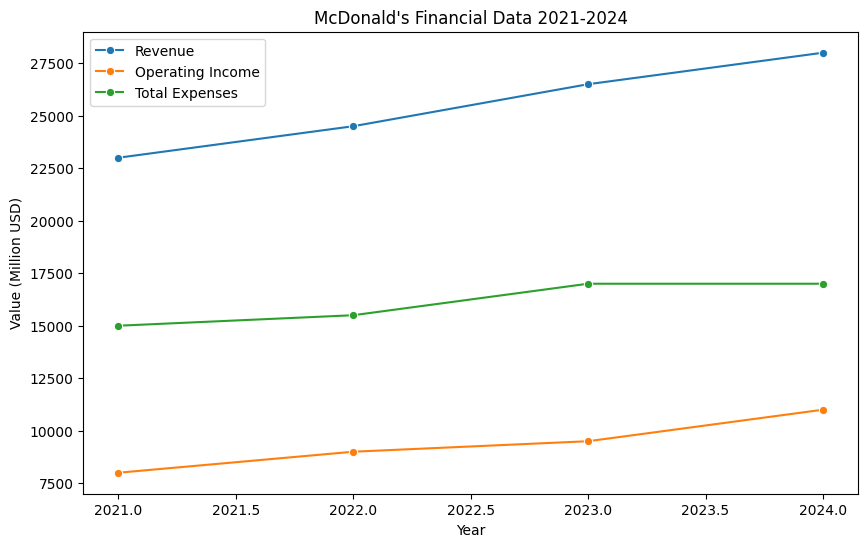

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Revenue', marker='o', label='Revenue')
sns.lineplot(data=df, x='Year', y='Operating Income', marker='o', label='Operating Income')
sns.lineplot(data=df, x='Year', y='Total Expenses', marker='o', label='Total Expenses')
plt.title("McDonald's Financial Data 2021-2024")
plt.ylabel("Value (Million USD)")
plt.show()


In [24]:
def categorize_performance(op_income):
    if op_income > 10000:
        return "Good"
    elif op_income > 8000:
        return "Moderate"
    else:
        return "Bad"

df['Performance'] = df['Operating Income'].apply(categorize_performance)
df


,Year,Revenue,Operating Income,Total Expenses,Performance
0,2021,23000,8000,15000,Bad
1,2022,24500,9000,15500,Moderate
2,2023,26500,9500,17000,Moderate
3,2024,28000,11000,17000,Good


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[['Revenue','Total Expenses']]
y = df['Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00       0.0
    Moderate       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [35]:
!pip install -q langchain langchain-community replicate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00


In [37]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Ambil token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Inisialisasi model
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    replicate_api_token=api_token,
)

# Beri prompt
prompt = "Buatkan ringkasan tugas akhir tentang sistem penjadwalan asisten laboratorium berbasis AI"
output = llm(prompt)

print(output)


/tmp/ipython-input-37-2281959832.py:17: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  output = llm(prompt)


**Ringkasan Tugas Akhir: Sistem Penjadwalan Asisten Laboratorium Berbasis AI**

**1. Tema:**
Pengembangan sistem penjadwalan asisten laboratorium berbasis AI untuk optimasi penggunaan sumber daya dan meningkatkan efisiensi operasi.

**2. Tujuan:**
- Mengembangkan sebuah sistem penjadwalan yang menggunakan inteligensi artifisial (AI) untuk mencakup dan mengoptimalkan pemeliharaan, penggunaan alat, dan pekerjaan asisten laboratorium.
- Memperjelas dan memperkaya proses penjadwalan asisten laboratorium, mengurangi waktu pekerjaan yang tidak efisien, dan meningkatkan penggunaan sumber daya.

**3. Metodologi:**
- Penelitian dan penilaian lingkungan laboratorium saat ini.
- Identifikasi tahap-tahap dan pekerjaan asisten laboratorium yang dapat dioptimalkan dengan AI.
- Pemilihan algoritma dan teknologi AI yang tepat (misalnya, machine learning, deep learning, atau rekayasa genetika).
- Desain dan implementasi sistem penjadwalan berbasis AI.
- Pengujian dan validasi sistem melalui simulasi da

In [38]:
import pandas as pd

# contoh jika data sudah kamu load ke df
df.head()
df.describe()
df.columns
df.isnull().sum()


,0
Year,0
Revenue,0
Operating Income,0
Total Expenses,0
Performance,0


In [39]:
prompt = """
Berikut ini adalah data keuangan McDonald's dari tahun 2021–2024:

{}

Berikan insight dan analisis AI terhadap data tersebut. Apa tren yang terlihat? Apa kesimpulannya?
""".format(df.head(10).to_string())


In [40]:
output = llm(prompt)
print(output)


Based on the financial data provided for McDonald's from 2021 to 2024, here are the insights and analysis:

1. **Revenue Trend**: McDonald's revenue has shown a consistent upward trend over the four years, increasing from $23,000 million in 2021 to $28,000 million in 2024. This indicates a positive growth rate, suggesting successful business strategies and market acceptance.

2. **Operating Income Trend**: Operating income has also grown steadily, rising from $8,000 million in 2021 to $11,000 million in 2024. This growth aligns with the revenue trend, indicating improved operational efficiency and profitability.

3. **Total Expenses Trend**: Total expenses have increased from $15,000 million in 2021 to $17,000 million in 2024. Although expenses have risen, the rate of increase is lower than revenue and operating income, indicating a healthy margin expansion.

4. **Performance Assessment**: The performance assessment varies from 'Bad' in 2021 to 'Good' in 2024, reflecting an overall imp